Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to C:\Users\user/.cache\torch\hub\checkpoints\mobilenet_v2-7ebf99e0.pth


100%|█████████████████████████████████████████████████████████████████████████████| 13.6M/13.6M [00:08<00:00, 1.77MB/s]
Epoch 1/10: 100%|█████████████████████████████████████████████████████████| 831/831 [08:50<00:00,  1.57it/s, loss=2.83]


Train Acc: 0.5541, Train Loss: 2.6678 | Val Acc: 0.7799, Val Loss: 2.5016
Saved Best Model!


Epoch 2/10: 100%|█████████████████████████████████████████████████████████| 831/831 [10:22<00:00,  1.33it/s, loss=2.54]


Train Acc: 0.7583, Train Loss: 1.8861 | Val Acc: 0.8223, Val Loss: 2.2804
Saved Best Model!


Epoch 3/10: 100%|████████████████████████████████████████████████████████████| 831/831 [05:29<00:00,  2.52it/s, loss=2]


Train Acc: 0.8072, Train Loss: 1.7025 | Val Acc: 0.8519, Val Loss: 2.1780
Saved Best Model!


Epoch 4/10: 100%|█████████████████████████████████████████████████████████| 831/831 [06:31<00:00,  2.12it/s, loss=1.59]


Train Acc: 0.8333, Train Loss: 1.6206 | Val Acc: 0.8555, Val Loss: 2.1355
Saved Best Model!


Epoch 5/10: 100%|█████████████████████████████████████████████████████████| 831/831 [05:49<00:00,  2.37it/s, loss=1.28]


Train Acc: 0.8507, Train Loss: 1.5713 | Val Acc: 0.8807, Val Loss: 2.0792
Saved Best Model!


Epoch 6/10: 100%|█████████████████████████████████████████████████████████| 831/831 [05:42<00:00,  2.43it/s, loss=2.29]


Train Acc: 0.8647, Train Loss: 1.5355 | Val Acc: 0.8789, Val Loss: 2.0625


Epoch 7/10: 100%|█████████████████████████████████████████████████████████| 831/831 [06:00<00:00,  2.30it/s, loss=1.92]


Train Acc: 0.8739, Train Loss: 1.5104 | Val Acc: 0.8942, Val Loss: 2.0297
Saved Best Model!


Epoch 8/10: 100%|█████████████████████████████████████████████████████████| 831/831 [05:25<00:00,  2.56it/s, loss=1.39]


Train Acc: 0.8793, Train Loss: 1.4917 | Val Acc: 0.9076, Val Loss: 1.9886
Saved Best Model!


Epoch 9/10: 100%|█████████████████████████████████████████████████████████| 831/831 [05:26<00:00,  2.54it/s, loss=1.51]


Train Acc: 0.8863, Train Loss: 1.4712 | Val Acc: 0.9083, Val Loss: 1.9827
Saved Best Model!


Epoch 10/10: 100%|████████████████████████████████████████████████████████| 831/831 [05:13<00:00,  2.65it/s, loss=2.18]


Train Acc: 0.8900, Train Loss: 1.4648 | Val Acc: 0.9124, Val Loss: 1.9730
Saved Best Model!

🔧 Fine-tuning backbone...


Epoch 1/10: 100%|█████████████████████████████████████████████████████████| 831/831 [05:41<00:00,  2.44it/s, loss=1.56]


[FineTune] Train Acc: 0.8950 | Val Acc: 0.9258


Epoch 2/10: 100%|██████████████████████████████████████████████████████████| 831/831 [05:28<00:00,  2.53it/s, loss=1.5]


[FineTune] Train Acc: 0.9085 | Val Acc: 0.9255


Epoch 3/10: 100%|██████████████████████████████████████████████████████████| 831/831 [05:28<00:00,  2.53it/s, loss=1.9]


[FineTune] Train Acc: 0.9101 | Val Acc: 0.9296


Epoch 4/10: 100%|█████████████████████████████████████████████████████████| 831/831 [05:30<00:00,  2.51it/s, loss=2.08]


[FineTune] Train Acc: 0.9190 | Val Acc: 0.9348


Epoch 5/10: 100%|█████████████████████████████████████████████████████████| 831/831 [05:37<00:00,  2.46it/s, loss=1.86]


[FineTune] Train Acc: 0.9205 | Val Acc: 0.9370

✅ Test Accuracy: 0.9376636982713462

📊 Classification Report:

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.92      0.94        63
                                 Apple___Black_rot       0.97      0.98      0.98        63
                          Apple___Cedar_apple_rust       0.90      1.00      0.95        28
                                   Apple___healthy       0.97      0.90      0.94       165
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.73      0.87      0.79        52
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       120
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.84      0.88        99
                            Corn_(maize)___healthy       1.00      1.00      1.00       117
          Orange___Haunglongbing_(Citrus_greening)       1.0

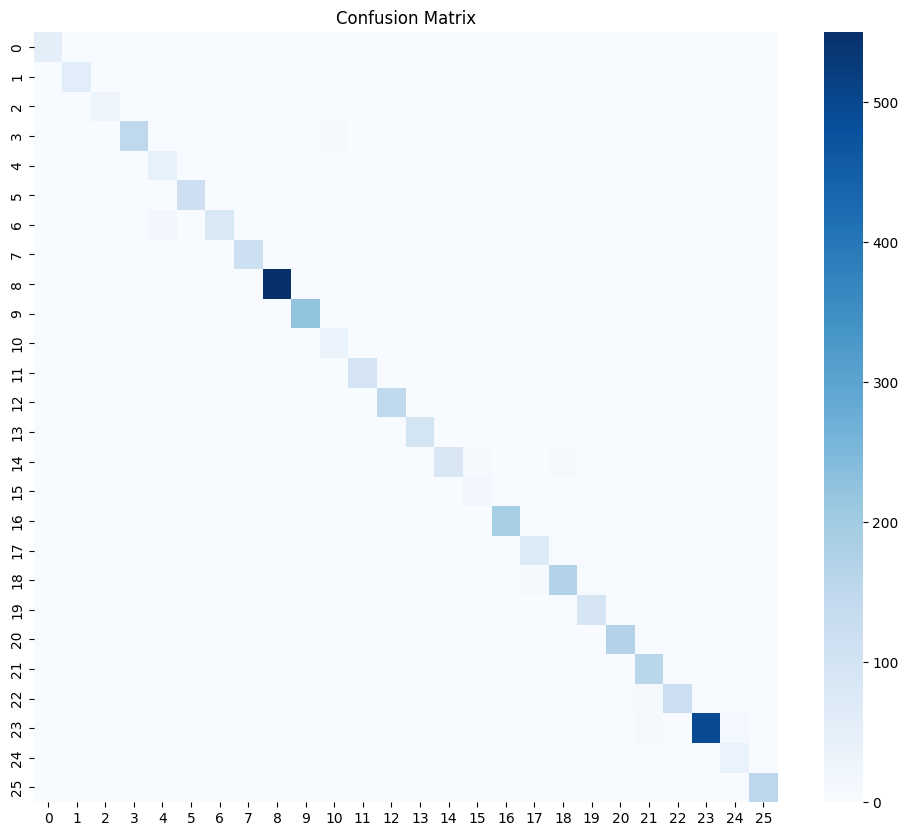

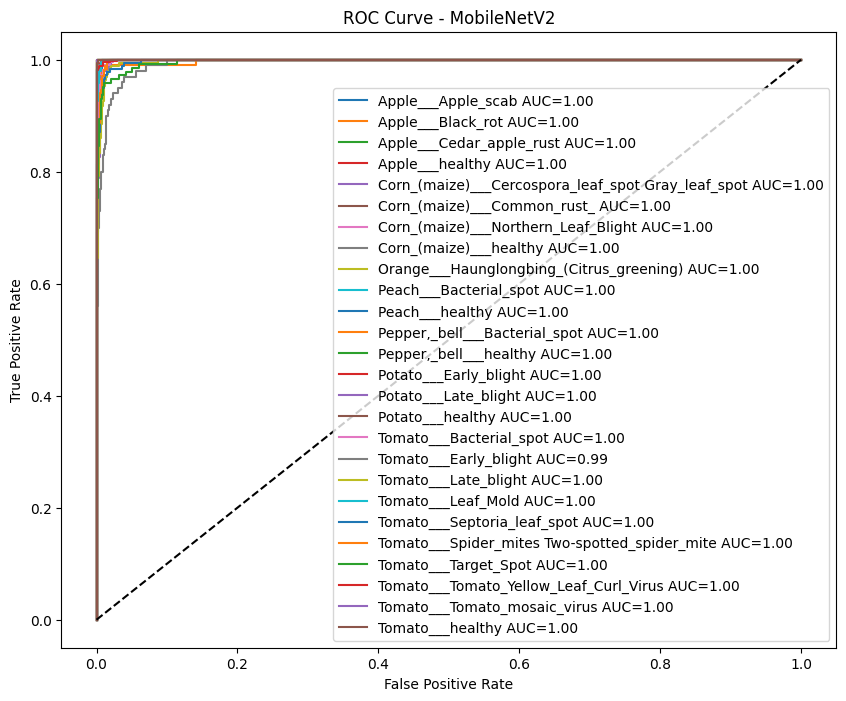

In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
from tqdm import tqdm
# ================= ADVANCED SETTINGS =================
from torch.optim.lr_scheduler import CosineAnnealingLR
import torch.nn.functional as F

LABEL_SMOOTHING = 0.1


# ================= CONFIG =================
DATA_DIR = "dataset_split"
BATCH_SIZE = 32
IMG_SIZE = 224
EPOCHS = 10
NUM_CLASSES = 26
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# ================= TRANSFORMS =================
train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(IMG_SIZE, scale=(0.8,1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],
                         std=[0.229,0.224,0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],
                         std=[0.229,0.224,0.225])
])

# ================= DATA =================
NUM_WORKERS = 0
train_dataset = datasets.ImageFolder(os.path.join(DATA_DIR, "train"), transform=train_transforms)
val_dataset   = datasets.ImageFolder(os.path.join(DATA_DIR, "val"), transform=val_test_transforms)
test_dataset  = datasets.ImageFolder(os.path.join(DATA_DIR, "test"), transform=val_test_transforms)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True , num_workers=NUM_WORKERS, pin_memory=True)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False , num_workers=NUM_WORKERS, pin_memory=True)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False , num_workers=NUM_WORKERS, pin_memory=True)

class_names = train_dataset.classes

# ================= CLASS WEIGHTS =================
class_counts = np.bincount(train_dataset.targets)
class_weights = 1. / class_counts
class_weights = class_weights / class_weights.sum()
class_weights = torch.tensor(class_weights, dtype=torch.float).to(DEVICE)

# ================= LOAD MOBILENET =================
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights

weights = MobileNet_V2_Weights.DEFAULT
model = mobilenet_v2(weights=weights)

# Freeze backbone
for param in model.parameters():
    param.requires_grad = False

# Replace classifier
in_features = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Linear(in_features, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, NUM_CLASSES)
)

model = model.to(DEVICE)

# ================= LOSS & OPTIMIZER =================
criterion = nn.CrossEntropyLoss(
    weight=class_weights,
    label_smoothing=LABEL_SMOOTHING
)

optimizer = optim.Adam(model.classifier.parameters(), lr=1e-4)
scheduler = CosineAnnealingLR(optimizer, T_max=EPOCHS)


# ================= TRAIN + PROGRESS BAR =================
def train_one_epoch(model, loader, epoch):
    model.train()
    running_loss, correct, total = 0, 0, 0
    loop = tqdm(loader, desc=f"Epoch {epoch}/{EPOCHS}")

    for images, labels in loop:
        images, labels = images.to(DEVICE), labels.to(DEVICE)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        preds = torch.argmax(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        loop.set_postfix(loss=loss.item())

    return running_loss / len(loader), correct / total


def eval_model(model, loader):
    model.eval()
    running_loss, correct, total = 0, 0, 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            preds = torch.argmax(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return running_loss / len(loader), correct / total, all_labels, all_preds


# ================= TRAIN =================
best_val_acc = 0

for epoch in range(1, EPOCHS+1):
    train_loss, train_acc = train_one_epoch(model, train_loader, epoch)
    val_loss, val_acc, _, _ = eval_model(model, val_loader)

    print(f"Train Acc: {train_acc:.4f}, Train Loss: {train_loss:.4f} | "
          f"Val Acc: {val_acc:.4f}, Val Loss: {val_loss:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_mobilenet_model.pth")
        print("Saved Best Model!")

# ================= FINE TUNING =================
print("\n🔧 Fine-tuning backbone...")

for name, param in model.features.named_parameters():
    if "17" in name or "18" in name:   # آخر blocks
        param.requires_grad = True
    else:
        param.requires_grad = False

optimizer = optim.Adam(model.parameters(), lr=1e-5)

for epoch in range(1, 6):
    train_loss, train_acc = train_one_epoch(model, train_loader, epoch)
    val_loss, val_acc, _, _ = eval_model(model, val_loader)

    print(f"[FineTune] Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")


# ================= TEST =================
test_loss, test_acc, y_true, y_pred = eval_model(model, test_loader)

print("\n✅ Test Accuracy:", test_acc)

# ================= REPORT =================
print("\n📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# ================= CONFUSION MATRIX =================
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# ================= ROC CURVE =================
y_true_bin = label_binarize(y_true, classes=range(NUM_CLASSES))

y_pred_prob = []
model.eval()
with torch.no_grad():
    for images, _ in test_loader:
        images = images.to(DEVICE)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        y_pred_prob.extend(probs.cpu().numpy())

y_pred_prob = np.array(y_pred_prob)

plt.figure(figsize=(10,8))

for i in range(NUM_CLASSES):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} AUC={roc_auc:.2f}")

plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve - MobileNetV2")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


In [2]:
torch.save(model.state_dict(), "best_mobilenet_finetuned.pth")
print("Fine-tuned model saved!")


Fine-tuned model saved!


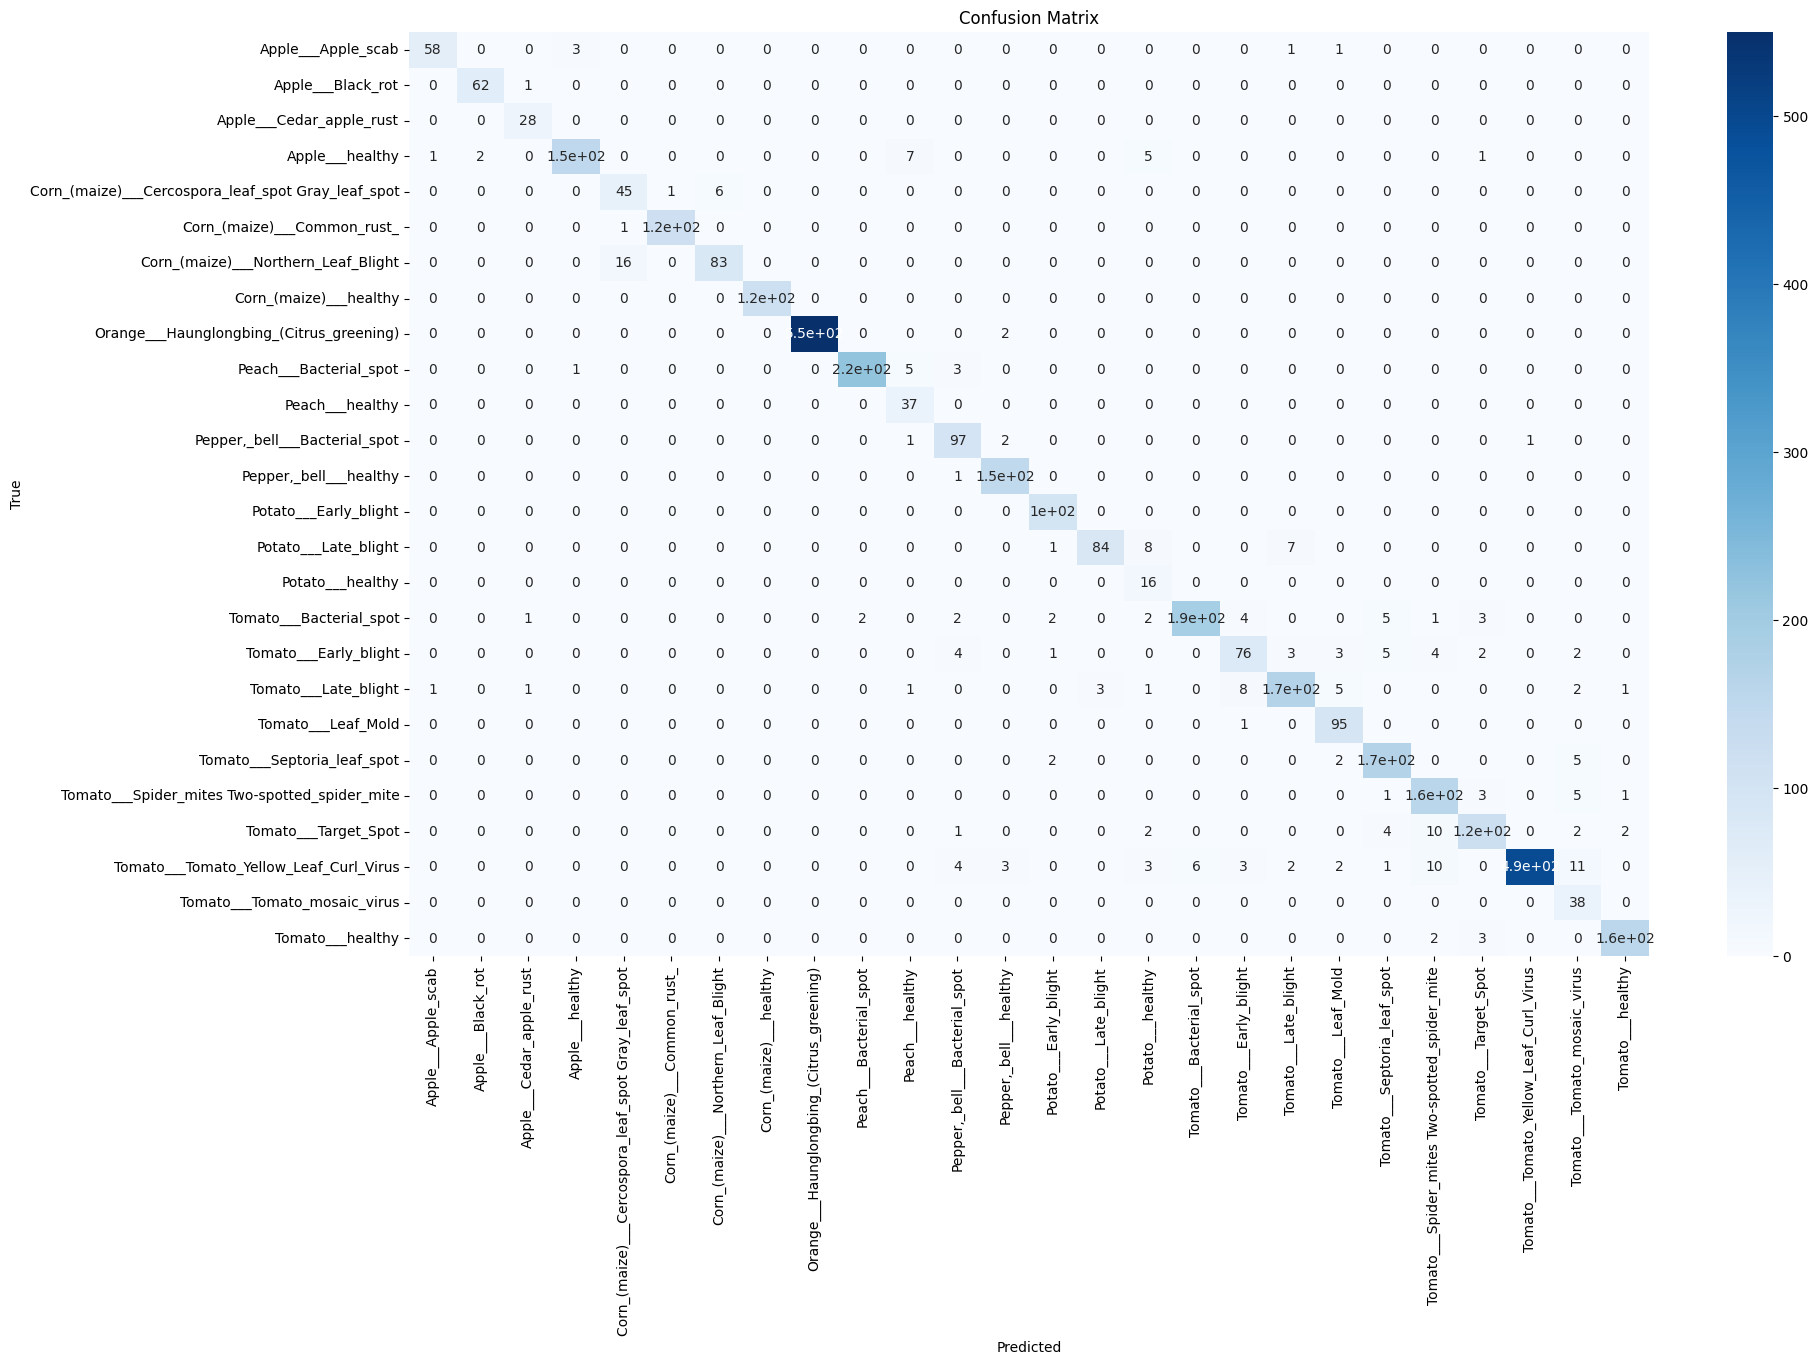

In [9]:
class_names = train_dataset.classes
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(20, 12))
sns.heatmap(cm, annot=True,  cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


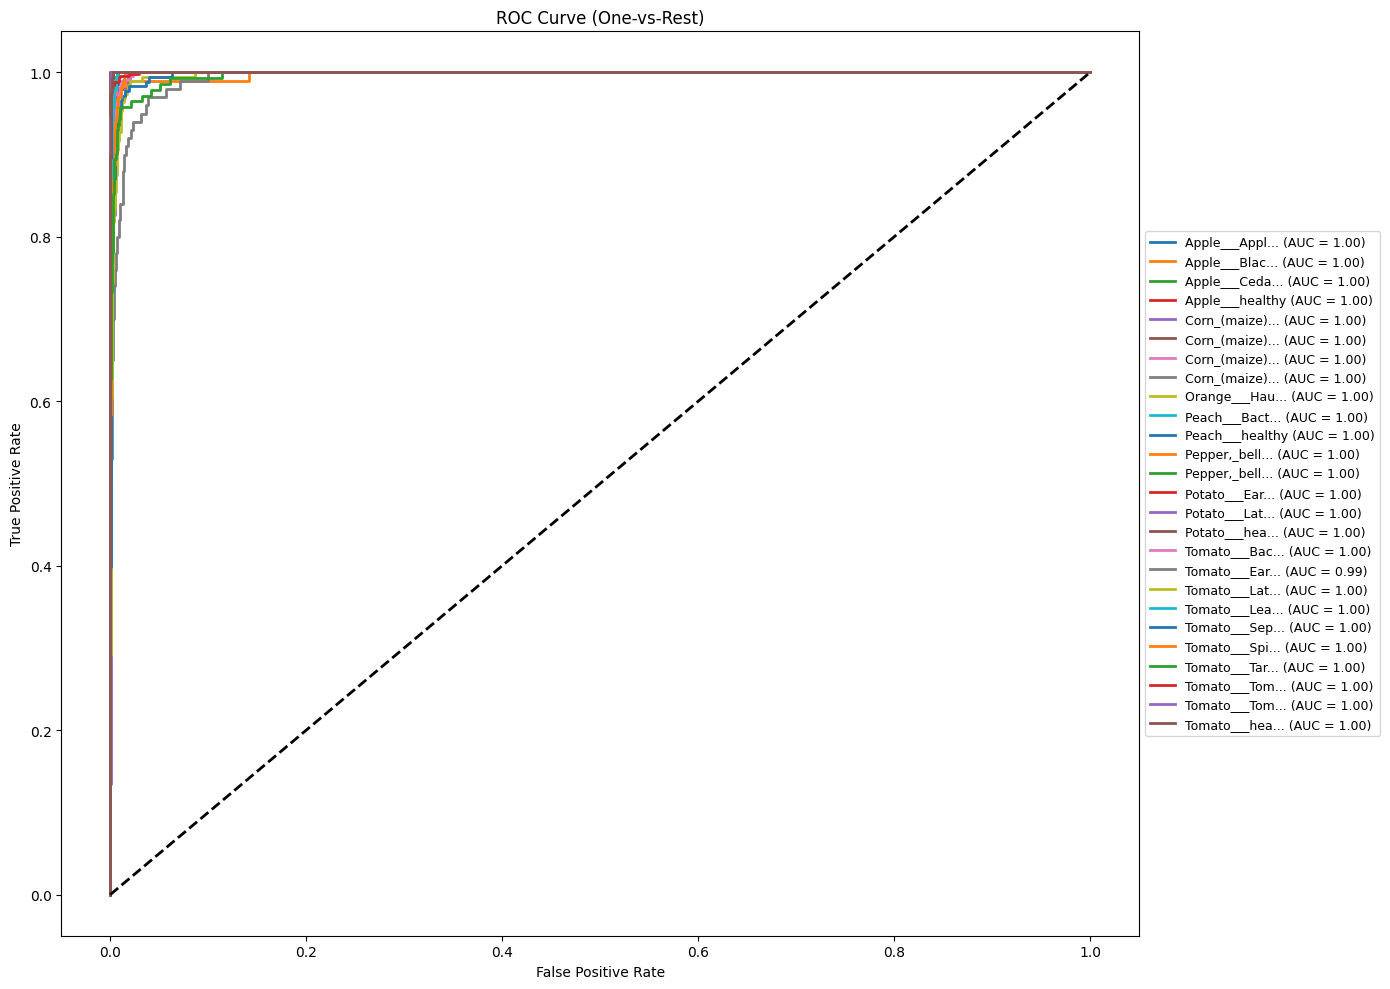

In [10]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

y_true_bin = label_binarize(y_true, classes=list(range(len(class_names))))
n_classes = y_true_bin.shape[1]

plt.figure(figsize=(14, 10))  

short_names = [name if len(name) <= 15 else name[:12]+"..." for name in class_names]

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    auc_score = roc_auc_score(y_true_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, lw=2, label=f"{short_names[i]} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest)")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)
plt.tight_layout()
plt.show()
